In [1]:
# install packages
pip install xgboost
pip install scikit-learn
pip install tensorflow
pip install pandas

SyntaxError: invalid syntax (3859720516.py, line 2)

In [2]:
# import libraries
import numpy as np
import pandas as pd
import glob
import os
import chardet
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
import xgboost as XGClassifier

2025-04-08 13:03:12.717155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
### Data Preprocessing

In [50]:
##### merge dataset into a master dataset
path = '/Users/ka-hyoncho/Capstone' 
all_files = glob.glob(os.path.join(path, "ga*.csv")) 

In [51]:
dfs = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='utf-8-sig')
    dfs.append(df)

In [52]:
ga_df = pd.concat(dfs, ignore_index=True)

In [53]:
ga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Columns: 1334 entries, YEAR to OPP_TOP20_WHT_M_N
dtypes: float64(1250), int64(80), object(4)
memory usage: 19.4+ MB


In [54]:
ga_df.describe()

,YEAR,COUNTYFIPS,STATEFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,...,OPP_TOP20_BLK_F_N,OPP_TOP20_BLK_M_N,OPP_TOP20_HSP_F_N,OPP_TOP20_HSP_M_N,OPP_TOP20_NAM_F_N,OPP_TOP20_NAM_M_N,OPP_TOP20_OTHER_F_N,OPP_TOP20_OTHER_M_N,OPP_TOP20_WHT_F_N,OPP_TOP20_WHT_M_N
count,1908.000000,1908.000000,1908.0,1.908000e+03,1.908000e+03,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,...,147.000000,146.000000,80.000000,78.000000,9.000000,9.00000,48.000000,49.000000,159.000000,159.000000
mean,2014.500000,13161.490566,13.0,6.264434e+04,6.184407e+04,58405.579140,49620.308176,48730.322851,3606.609015,40705.888889,...,871.619048,842.486301,200.487500,208.948718,38.777778,41.00000,135.770833,122.551020,1458.635220,1516.578616
std,3.452958,93.012432,0.0,1.333665e+05,1.316193e+05,124109.702197,105453.829084,103566.874378,7399.152339,87004.531230,...,2514.636659,2430.861849,365.335566,385.760436,16.300136,15.32971,182.201109,163.769918,2579.107071,2648.764726
min,2009.000000,13001.000000,13.0,1.596000e+03,1.567000e+03,1532.000000,1414.000000,1401.000000,39.000000,1168.000000,...,21.000000,20.000000,20.000000,20.000000,20.000000,25.00000,20.000000,20.000000,28.000000,21.000000
25%,2011.750000,13081.000000,13.0,1.144025e+04,1.133000e+04,10778.500000,9320.750000,9184.250000,646.000000,7766.750000,...,115.500000,109.250000,30.000000,33.000000,26.000000,28.00000,34.250000,29.000000,240.500000,246.000000
50%,2014.500000,13161.000000,13.0,2.263250e+04,2.231800e+04,21156.500000,18126.500000,17792.000000,1253.000000,15321.500000,...,243.000000,234.500000,70.500000,83.500000,32.000000,31.00000,63.500000,55.000000,575.000000,597.000000
75%,2017.250000,13243.000000,13.0,5.277575e+04,5.194350e+04,48969.250000,41370.000000,40554.250000,3129.750000,32988.500000,...,529.000000,498.000000,160.500000,172.000000,50.000000,57.00000,127.250000,108.000000,1465.000000,1515.500000
max,2020.000000,13321.000000,13.0,1.051550e+06,1.038670e+06,990461.000000,861867.000000,848245.000000,56909.000000,716013.000000,...,20892.000000,20385.000000,2095.000000,2273.000000,65.000000,60.00000,816.000000,721.000000,18203.000000,18858.000000


In [ ]:
##### target variable = "TOT_DEATH"

In [55]:
print(ga_df["TOT_DEATH"].dtype)

object


In [56]:
df_filtered['TOT_DEATH'].describe()

count           3728
unique           701
top       Suppressed
freq              88
Name: TOT_DEATH, dtype: object

In [57]:
ga_df["TOT_DEATH"] = pd.to_numeric(ga_df["TOT_DEATH"], errors='coerce')

In [58]:
target_variable = "TOT_DEATH"
exclude_columns = ["YEAR", "COUNTYFIPS", "STATEFIPS", "STATE", "COUNTY", "REGION"]
numerical_columns = [col for col in ga_df.columns if col not in exclude_columns and ga_df[col].dtype in ['int64', 'float64']]
df_numeric = ga_df[["YEAR"] + numerical_columns].copy()

In [59]:
if target_variable in ga_df.columns:
    df_numeric = ga_df[["YEAR"] + numerical_columns].copy()

In [60]:
###### Missing values will be replaced with the median value for now
df_numeric.fillna(df_numeric.median(), inplace=True)

In [61]:
df_numeric[target_variable] = pd.to_numeric(df_numeric[target_variable], errors='coerce')

In [62]:
df_numeric.dropna(subset=[target_variable], inplace=True)

In [63]:
ga_df['TOT_DEATH'].describe()

count    1820.000000
mean      112.088462
std       183.093980
min        10.000000
25%        29.000000
50%        55.000000
75%       113.250000
max      1462.000000
Name: TOT_DEATH, dtype: float64

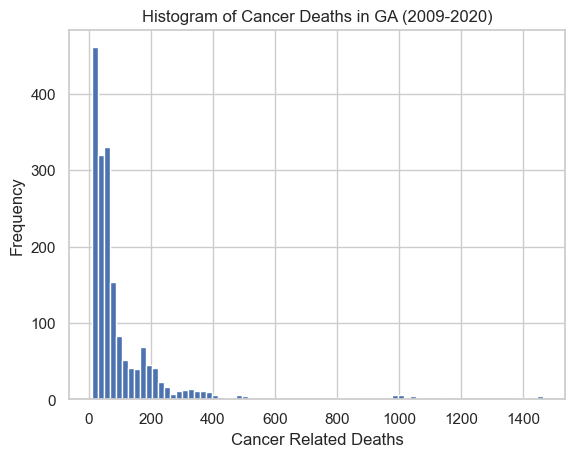

In [64]:
import seaborn as sns

sns.set(style="whitegrid")
plt.hist(ga_df['TOT_DEATH'], bins = 75)
plt.xlabel('Cancer Related Deaths')
plt.ylabel('Frequency')
plt.title('Histogram of Cancer Deaths in GA (2009-2020)')
plt.show()

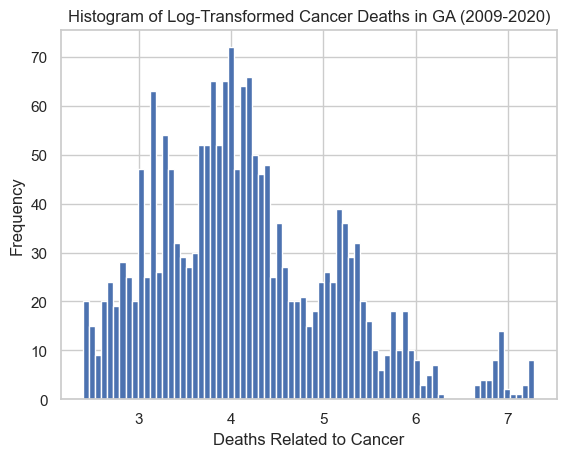

In [65]:
# Avoid log(0) by adding a small constant (or filter zeros)
log_death = np.log1p(ga_df['TOT_DEATH'])  # log1p(x) = log(x + 1)

plt.hist(log_death, bins=75)
plt.xlabel('Deaths Related to Cancer')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Cancer Deaths in GA (2009-2020)')
plt.grid(True)
plt.show()

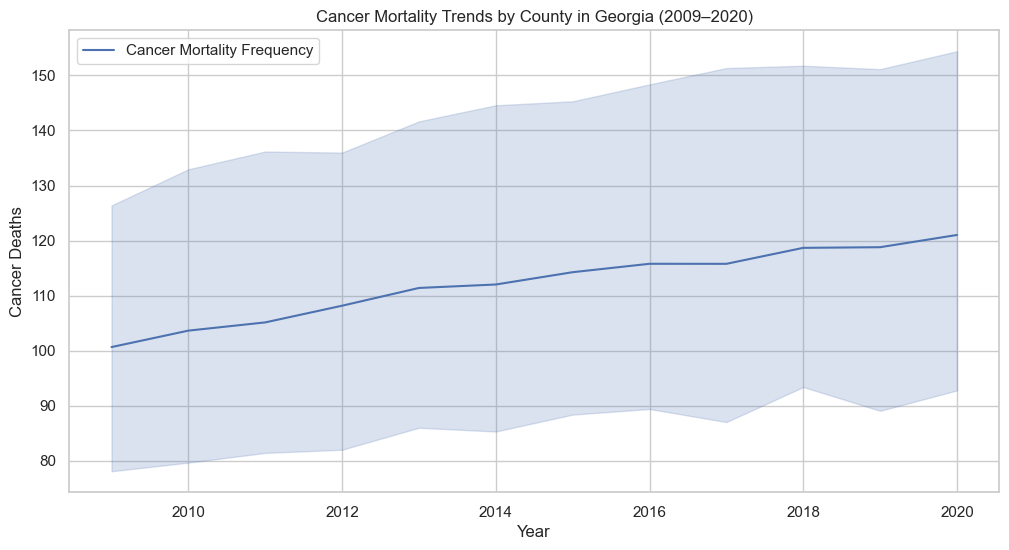

In [66]:
#Time-series
plt.figure(figsize=(12, 6))  
sns.lineplot(data=ga_df, x='YEAR', y='TOT_DEATH',label='Cancer Mortality Frequency')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cancer Deaths')
plt.title('Cancer Mortality Trends by County in Georgia (2009–2020)')
plt.savefig('US GA HIST TIME-SERIES poster', dpi= 300, bbox_inches = 'tight')
plt.show()

In [67]:
###### 50/50 Split
train_data = df_numeric[df_numeric["YEAR"].between(2009, 2014)].drop(columns=["YEAR"])
test_data = df_numeric[df_numeric["YEAR"].between(2015, 2020)].drop(columns=["YEAR"])

In [68]:
###### Dr. Han is only looking for Five key SDOH domains: social, economic, education, physical infrastructure, and healthcare context
###### we will eliminate demographic domain for now.
columns_to_exclude = [
    "ACS_AVG_HH_SIZE", "ACS_MEDIAN_AGE", "ACS_MEDIAN_AGE_FEMALE", "ACS_MEDIAN_AGE_MALE",
    "ACS_PCT_AGE_0_17", "ACS_PCT_AGE_0_4", "ACS_PCT_AGE_10_14", "ACS_PCT_AGE_15_17",
    "ACS_PCT_AGE_18_29", "ACS_PCT_AGE_18_44", "ACS_PCT_AGE_30_44", "ACS_PCT_AGE_45_64",
    "ACS_PCT_AGE_50_64", "ACS_PCT_AGE_5_9", "ACS_PCT_AGE_ABOVE65", "ACS_PCT_AGE_ABOVE80",
    "ACS_PCT_AIAN", "ACS_PCT_AIAN_COMB", "ACS_PCT_AIAN_FEMALE", "ACS_PCT_AIAN_MALE",
    "ACS_PCT_AIAN_NONHISP", "ACS_PCT_API_LANG", "ACS_PCT_ASIAN", "ACS_PCT_ASIAN_COMB",
    "ACS_PCT_ASIAN_FEMALE", "ACS_PCT_ASIAN_MALE", "ACS_PCT_ASIAN_NONHISP", "ACS_PCT_BLACK",
    "ACS_PCT_BLACK_COMB", "ACS_PCT_BLACK_FEMALE", "ACS_PCT_BLACK_MALE", "ACS_PCT_BLACK_NONHISP",
    "ACS_PCT_DIVORCED_F", "ACS_PCT_DIVORCED_M", "ACS_PCT_ENGLISH", "ACS_PCT_ENGL_NOT_ALL",
    "ACS_PCT_ENGL_NOT_WELL", "ACS_PCT_ENGL_VERY_WELL", "ACS_PCT_ENGL_WELL", "ACS_PCT_FEMALE",
    "ACS_PCT_GULFWAR_1990_2001", "ACS_PCT_GULFWAR_2001", "ACS_PCT_GULFWAR_VIETNAM",
    "ACS_PCT_HH_LIMIT_ENGLISH", "ACS_PCT_HISPANIC", "ACS_PCT_HISP_FEMALE", "ACS_PCT_HISP_MALE",
    "ACS_PCT_HOUSEHOLDER_AIAN", "ACS_PCT_HOUSEHOLDER_ASIAN", "ACS_PCT_HOUSEHOLDER_BLACK",
    "ACS_PCT_HOUSEHOLDER_MULT", "ACS_PCT_HOUSEHOLDER_NHPI", "ACS_PCT_HOUSEHOLDER_OTHER",
    "ACS_PCT_HOUSEHOLDER_WHITE", "ACS_PCT_MALE", "ACS_PCT_MARRIED_SP_AB_F",
    "ACS_PCT_MARRIED_SP_AB_M", "ACS_PCT_MARRIED_SP_PR_F", "ACS_PCT_MARRIED_SP_PR_M",
    "ACS_PCT_MULT_RACE", "ACS_PCT_MULT_RACE_FEMALE", "ACS_PCT_MULT_RACE_MALE",
    "ACS_PCT_MULT_RACE_NONHISP", "ACS_PCT_NHPI", "ACS_PCT_NHPI_COMB", "ACS_PCT_NHPI_FEMALE",
    "ACS_PCT_NHPI_MALE", "ACS_PCT_NHPI_NONHISP", "ACS_PCT_NVR_MARRIED_F", "ACS_PCT_NVR_MARRIED_M",
    "ACS_PCT_OTHER_FEMALE", "ACS_PCT_OTHER_MALE", "ACS_PCT_OTHER_NONHISP", "ACS_PCT_OTHER_RACE",
    "ACS_PCT_OTH_EURP", "ACS_PCT_OTH_LANG", "ACS_PCT_POP_SAME_SEX_SPOUSE",
    "ACS_PCT_POP_SAME_SEX_UNMRD_P", "ACS_PCT_SAME_SEX_UNMRD_PRTNR", "ACS_PCT_SPANISH",
    "ACS_PCT_VET", "ACS_PCT_VIETNAM", "ACS_PCT_WHITE", "ACS_PCT_WHITE_COMB",
    "ACS_PCT_WHITE_FEMALE", "ACS_PCT_WHITE_MALE", "ACS_PCT_WHITE_NONHISP", "ACS_PCT_WIDOWED_F",
    "ACS_PCT_WIDOWED_M", "ACS_TOT_CIVIL_NONINST_POP", "ACS_TOT_CIVIL_POP_ABOVE18",
    "ACS_TOT_CIVIL_VET_POP", "ACS_TOT_CIVIL_VET_POP_ABOVE25", "ACS_TOT_HH",
    "ACS_TOT_OWN_CHILD_BELOW17", "ACS_TOT_POP_16_19", "ACS_TOT_POP_ABOVE15", "ACS_TOT_POP_ABOVE16",
    "ACS_TOT_POP_ABOVE25", "ACS_TOT_POP_ABOVE5", "ACS_TOT_POP_US_ABOVE1", "ACS_TOT_POP_WT",
    "AHRF_VET", "AHRF_VET_FEMALE", "AHRF_VET_MALE", "CCBP_ANNUAL_TOT_POP"
]

train_data = train_data.drop(columns=columns_to_exclude, errors='ignore')
test_data = test_data.drop(columns=columns_to_exclude, errors='ignore')

In [69]:
##### Split into features and target variable
X_train = train_data.drop(columns=[target_variable])
y_train = train_data[target_variable]
X_test = test_data.drop(columns=[target_variable])
y_test = test_data[target_variable]

In [70]:
print("Dropped columns still in X_train?", any(col in X_train.columns for col in columns_to_exclude))

Dropped columns still in X_train? False


In [71]:
from sklearn.model_selection import train_test_split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [72]:
# Log-transform the target variable
y_train_log = np.log1p(y_train)

In [73]:
##### Feature selection using Random Forest
rf_selector = RandomForestRegressor(n_estimators= 200, random_state=42)
rf_selector.fit(X_train, y_train_log)

RandomForestRegressor(n_estimators=200, random_state=42)

In [74]:
###### Select important features
selector = SelectFromModel(rf_selector, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [75]:
##### Scaling (MinMaxScaler instead of StandardScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [76]:
##### Apply log transformation to target variable (to handle outliers)
y_test_log = np.log1p(y_test)

In [77]:
##### Define an improved Neural Network Model (LeakyReLU, Adam optimizer, and Dropout adjusted)
model = Sequential([
    Dense(256, input_shape=(X_train_scaled.shape[1],)),  # Reduced neurons
    LeakyReLU(alpha=0.1),  # Alternative activation function
    Dropout(0.2),  # Lower dropout rate

    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.1),

    Dense(1, activation="linear")  # Linear activation for regression
])

/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [78]:
##### Compile Model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

In [79]:
##### Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [80]:
##### Train Model
history = model.fit(
    X_train_scaled, y_train_log,  # Using log-transformed target
    validation_data=(X_test_scaled, y_test_log),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 17.9282 - mae: 4.1196 - val_loss: 15.9161 - val_mae: 3.8815
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6135 - mae: 3.7237 - val_loss: 12.5859 - val_mae: 3.4453
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4610 - mae: 3.2740 - val_loss: 7.9809 - val_mae: 2.7239
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7839 - mae: 2.4873 - val_loss: 3.3315 - val_mae: 1.6907
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5725 - mae: 1.4461 - val_loss: 1.2794 - val_mae: 0.8633
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4624 - mae: 0.9028 - val_loss: 0.9670 - val_mae: 0.6874
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1145 - mae: 0.7681 - val_loss: 0.7966 - val_mae: 0.6756
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8371 - mae: 0.7241 - val_loss: 0.7198 - val_mae: 0.6584
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

In [81]:
##### Evaluate Model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_log)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071 - mae: 0.2366 
Test Loss: 0.10282807052135468
Test MAE: 0.23297932744026184


In [82]:
##### Predict and Convert Back from Log Scale
y_pred_log = model.predict(X_test_scaled)
y_pred_ffnn = np.expm1(y_pred_log)  # Convert back from log scale

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
##### performance metrics 

In [83]:
print(f"y_pred_log shape: {y_pred_log.shape}")
print(f"y_test shape: {y_test.shape}")

y_pred_log shape: (954, 1)
y_test shape: (954,)


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_log = model.predict(X_test_scaled)
y_pred_ffnn = np.expm1(y_pred_log.flatten())
mae_ffnn = mean_absolute_error(y_test, y_pred_ffnn)
mse_ffnn = mean_squared_error(y_test, y_pred_ffnn)
rmse_ffnn = np.sqrt(mse_ffnn)

print(f"FFNN MAE: {mae_ffnn:.3f}")
print(f"FFNN MSE: {mse_ffnn:.3f}")
print(f"FFNN RMSE: {rmse_ffnn:.3f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
FFNN MAE: 27.836
FFNN MSE: 6112.169
FFNN RMSE: 78.180


In [85]:
r2_ffnn = r2_score(y_test, y_pred_ffnn)
print(f"FFNN R² Score: {r2_ffnn:.3f}")

FFNN R² Score: 0.827


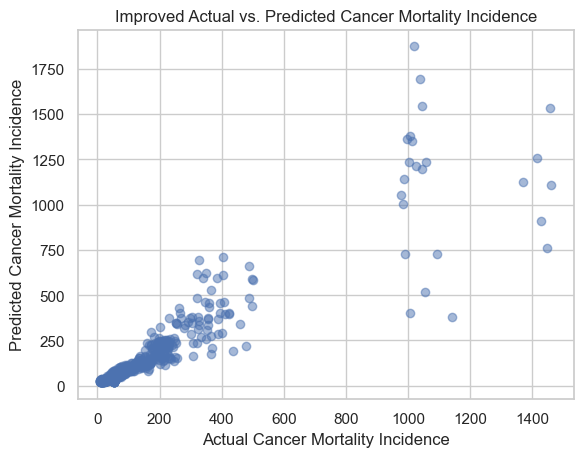

In [125]:
##### Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred_ffnn, alpha=0.5)
plt.xlabel("Actual Cancer Mortality Incidence")
plt.ylabel("Predicted Cancer Mortality Incidence")
plt.title("Improved Actual vs. Predicted Cancer Mortality Incidence")
plt.savefig("EDA1.png", bbox_inches = "tight")
plt.show()

In [87]:
###### Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_selected, y_train_log)
y_pred_rf = rf_model.predict(X_test_selected)
y_pred_rf = np.expm1(y_pred_rf)

In [306]:
from sklearn.model_selection import KFold
# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store MSE for each model across folds
mse_dict = {name: [] for name, _ in models}

# Store predictions per model per fold
fold_preds = []
fold_true = []

for train_idx, val_idx in kf.split(X_scaled):
    X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_tr, y_val = y_log[train_idx], y_log[val_idx]

    val_fold_preds = []

    for name, model in models:
        model.fit(X_tr, y_tr)
        y_pred_log = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred_log)
        mse_dict[name].append(mse)
        val_fold_preds.append(y_pred_log)

    fold_preds.append(val_fold_preds)
    fold_true.append(y_val)

# Calculate average inverse-MSE weights across folds
mean_mse = {name: np.mean(mse_dict[name]) for name in mse_dict}
inv_mse = np.array([1 / mean_mse[name] for name, _ in models])
ensemble_weights = inv_mse / inv_mse.sum()

# Combine predictions using weights
ensemble_preds = []
y_true_all = []

for i in range(len(fold_preds)):
    preds_log = np.array(fold_preds[i])  # shape: (n_models, n_samples)
    ensemble_log = np.average(preds_log, axis=0, weights=ensemble_weights)
    ensemble_pred = np.expm1(ensemble_log)
    ensemble_preds.extend(ensemble_pred)
    y_true_all.extend(np.expm1(fold_true[i]))

# Final ensemble metrics
mae_ensemble = mean_absolute_error(y_true_all, ensemble_preds)
rmse_ensemble = np.sqrt(mean_squared_error(y_true_all, ensemble_preds))
r2_ensemble = r2_score(y_true_all, ensemble_preds)

(mae_ensemble, rmse_ensemble, r2_ensemble, ensemble_weights)

ValueError: too many values to unpack (expected 2)

In [88]:
##### Evaluate Random Forest Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest MAE: 14.98644228498635
Random Forest MSE: 2310.8958025196766
Random Forest RMSE: 48.07177760931747


In [89]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"RF R² Score: {r2_rf:.3f}")

RF R² Score: 0.934


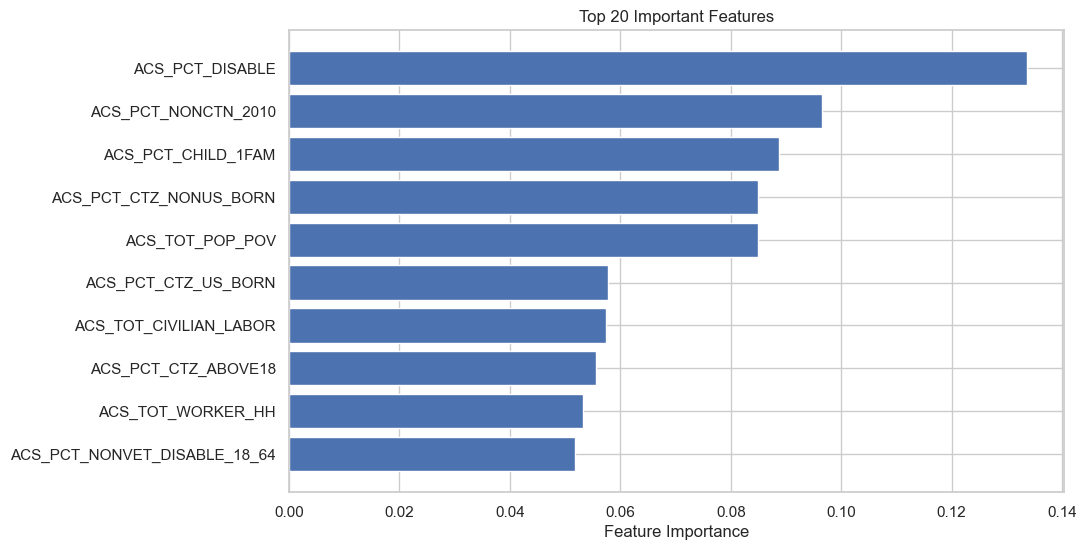

In [90]:
##### Feature Importance Plot
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_selected, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Get top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), np.array(X_train.columns)[indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.savefig("feature", bbox_inches= 'tight')
plt.show()

In [91]:
name_map = {
    "ACS_PCT_CTZ_US_BORN": "US Born Citizens (Percent)",
    "ACS_AVG_HH_SIZE": "Avg Household Size",
    "ACS_PCT_NONVET_DISABLE_18_64": "Disabled Nonveterans with Age 18–64 (Percent)",
    "ACS_PCT_CTZ_NONUS_BORN": "Foreign Born US Citizens (Percent)",
    "ACS_TOT_CIVIL_NONINST_POP": "Non-Institutionalized Civilians (Total)",
    "ACS_TOT_CIVIL_POP_POV": "Civilians in Poverty (Total)",
    "ACS_TOT_CIVILIAN_LABOR": "Civilians in Labor Force (Total)",
    "ACS_TOT_WORKER_HH": "Worker Households (Total)",
    "ACS_TOT_WORKER_NWFH": "Non-WFH Workers (Total)",
    "ACS_TOT_POP_ABOVE16": "Pop. Age 16+ (Total)",
    "ACS_TOT_HH": "Total Number of Households",
    "ACS_TOT_HU": "Total Housing Units",
    "ACS_TOT_POP_WT": "Total Weighted Population",
    "ACS_TOT_POP_POV": "Population in Poverty (Percent)",
    "ACS_PCT_DISABLE": "Disabled Population (Percent)",
    "ACS_PCT_NONCTN_2010": "Recent Non-Citizen Immigrant (Percent)",
    "ACS_PCT_CHILD_1FAM": "Single Parent Household (Percent)",
    "ACS_PCT_CTZ_NONUS_BORN": "Foreign-Born U.S. Citizens (Percent)",
    "ACS_PCT_CTZ_US_BORN": "U.S Born U.S. Citizens (Percent)",
    "ACS_PCT_CTZ_US_BORN": "Population with Poverty Status Determined (Total)",
    "ACS_PCT_CTZ_ABOVE18": "Citizens Age 18+ (Percent)",
    "ACS_PCT_CHILD_DISAB": "Children with a Disability Age >18 (Percent)"
}

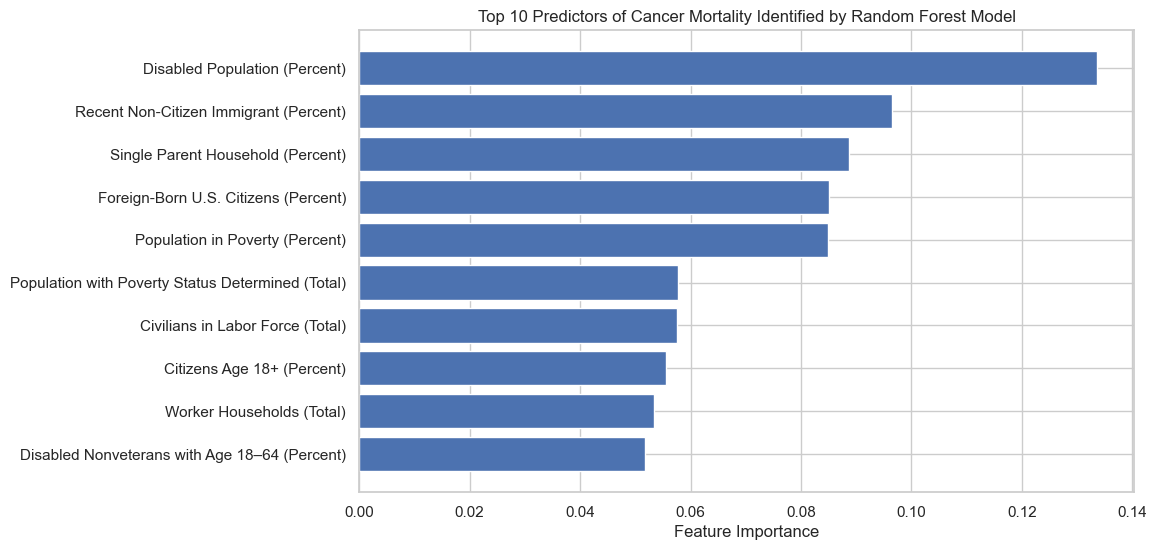

In [92]:
feature_names = np.array(X_train.columns)[indices]
pretty_names = [name_map.get(name, name) for name in feature_names]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), pretty_names)
plt.xlabel("Feature Importance")
plt.title("Top 10 Predictors of Cancer Mortality Identified by Random Forest Model")
plt.savefig("Feature plot rf.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # First 10 for exploration
X_pca = pca.fit_transform(X_train_scaled)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA on SDOH Features')
plt.grid(True)
plt.show()

NameError: name 'X_train_scaled' is not defined

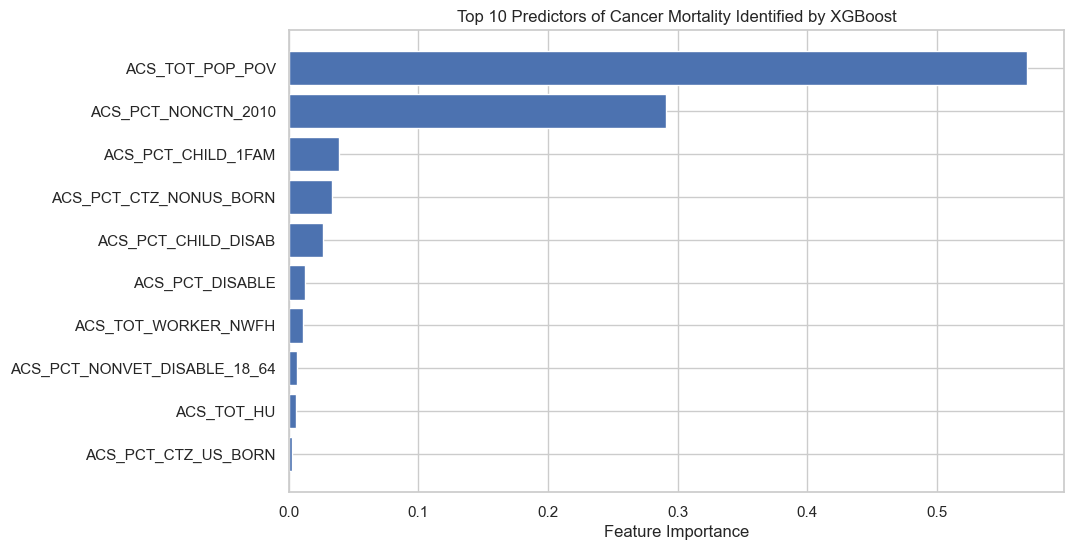

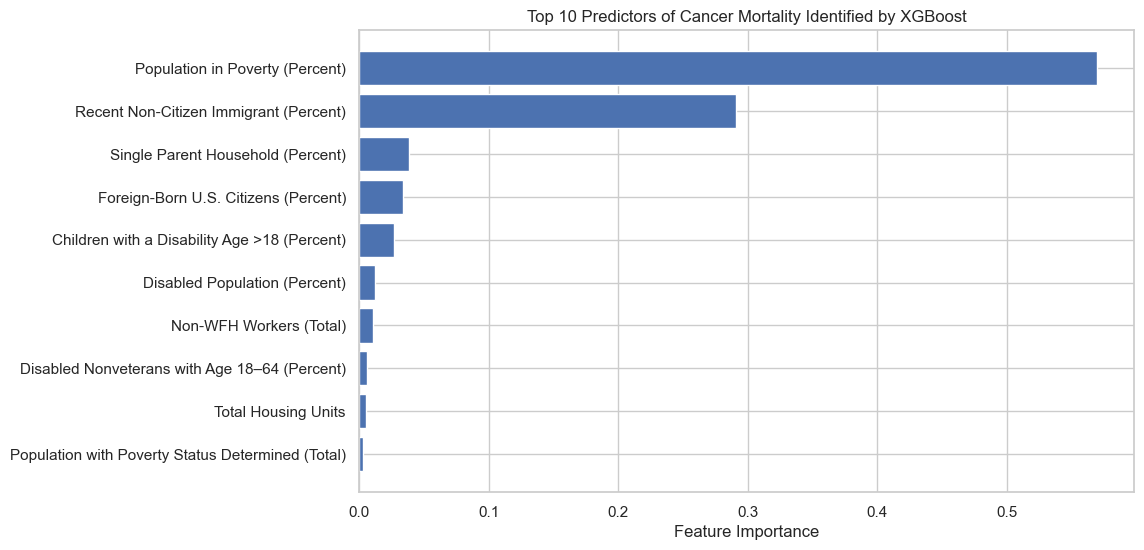

In [93]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=10, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Get feature importances (you can also try 'gain', 'weight', 'cover', etc.)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[-10:]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), np.array(X_train.columns)[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Predictors of Cancer Mortality Identified by XGBoost")
plt.savefig("xgb_feature_importance_poster.png", bbox_inches='tight')
plt.show()

feature_names = np.array(X_train.columns)[indices]
pretty_names = [name_map.get(name, name) for name in feature_names]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), pretty_names)
plt.xlabel("Feature Importance")
plt.title("Top 10 Predictors of Cancer Mortality Identified by XGBoost")
plt.savefig("Feature plot xgb.png", dpi = 300, bbox_inches = 'tight')
plt.show()

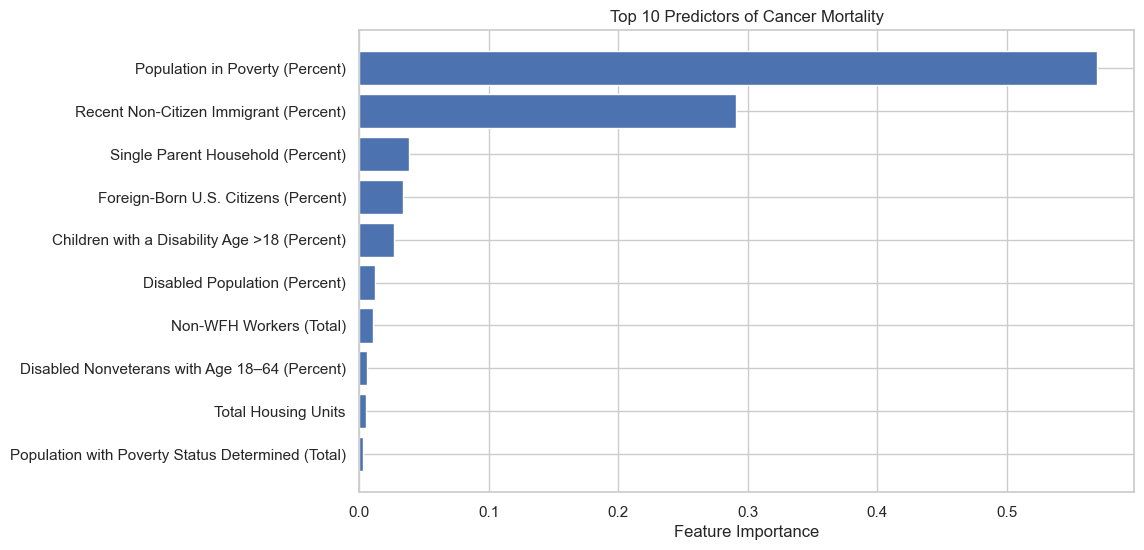

In [94]:
feature_names = np.array(X_train.columns)[indices]
pretty_names = [name_map.get(name, name) for name in feature_names]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), pretty_names)
plt.xlabel("Feature Importance")
plt.title("Top 10 Predictors of Cancer Mortality")
plt.show()

In [95]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test_selected, y_test_log, n_repeats=10, random_state=42)

In [97]:
##### XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_selected, y_train_log)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [98]:
y_pred_xgb = xgb_model.predict(X_test_selected)
y_pred_xgb = np.expm1(y_pred_xgb)

In [99]:
##### Evaluate XGBoost Performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost MAE: 16.33543369305209
XGBoost MSE: 3238.3242374139572
XGBoost RMSE: 56.91


In [100]:
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGB R² Score: {r2_xgb:.3f}")

XGB R² Score: 0.908


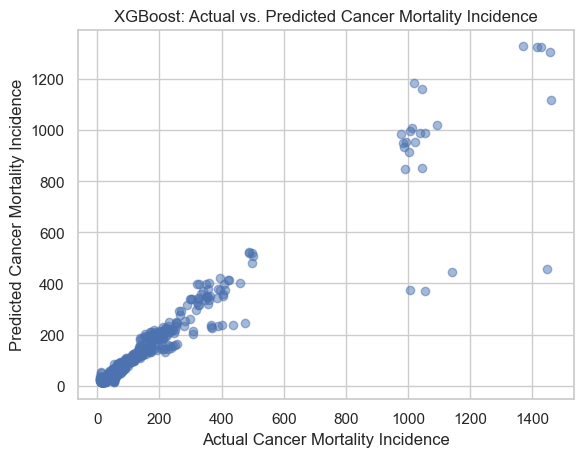

In [126]:
# Scatter plot for XGBoost predictions
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Cancer Mortality Incidence")
plt.ylabel("Predicted Cancer Mortality Incidence")
plt.title("XGBoost: Actual vs. Predicted Cancer Mortality Incidence")
plt.savefig("eda2.png", bbox_inches = "tight")
plt.show()

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
X_val_selected = selector.transform(X_val)
X_val_scaled = scaler.transform(X_val_selected)

/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

models = [
    RandomForestRegressor(n_estimators=200, random_state=42).fit(X_train_selected, y_train_log),
    GradientBoostingRegressor(n_estimators=200, random_state=42).fit(X_train_selected, y_train_log),
    LinearRegression().fit(X_train_selected, y_train_log),
    rf_model,
    xgb_model
]

In [105]:
# Predict on validation set (all in log scale)
val_predictions = [
    rf_model.predict(X_val_selected),
    xgb_model.predict(X_val_selected),
    model.predict(X_val_scaled).squeeze()  # FFNN
]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [108]:
y_val_log = np.log1p(y_val)

In [109]:
from sklearn.metrics import mean_squared_error

# Calculate MSE using log-transformed target
mse_scores = [mean_squared_error(y_val_log, pred) for pred in val_predictions]

# Inverse MSE weighting
weights = 1 / np.array(mse_scores)
weights /= np.sum(weights)

print("Optimal weights:", weights)

Optimal weights: [5.97392648e-08 9.44953922e-01 5.50460180e-02]


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, ensemble_pred)
mse = mean_squared_error(y_val, ensemble_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, ensemble_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 5.03
MSE: 75.74
RMSE: 8.70
R² Score: 0.999


In [110]:
# Weighted ensemble prediction (still in log scale)
ensemble_log = np.average(val_predictions, axis=0, weights=weights)

# Convert back to original scale
ensemble_pred = np.expm1(ensemble_log)

In [111]:
# Predict on test set (log scale)
test_predictions_log = [
    rf_model.predict(X_test_selected),
    xgb_model.predict(X_test_selected),
    model.predict(X_test_scaled).squeeze()  # FFNN
]

# Apply learned weights to test set
ensemble_test_log = np.average(test_predictions_log, axis=0, weights=weights)

# Convert back to original scale
ensemble_pred = np.expm1(ensemble_test_log)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [112]:
y_pred_rf = y_pred_rf.squeeze()
y_pred_xgb = y_pred_xgb.squeeze()
y_pred_ffnn = y_pred_ffnn.squeeze()

In [113]:
def plot_residuals(y_test, model_preds, model_names):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()

    for i, (pred, name) in enumerate(zip(model_preds, model_names)):
        residuals = y_test - pred
        sns.scatterplot(x=y_test, y=residuals, ax=axs[i])
        axs[i].axhline(0, color='red', linestyle='--')
        axs[i].set_title(f"Residual Plot: {name}")
        axs[i].set_xlabel("Actual")
        axs[i].set_ylabel("Residual")

    plt.suptitle("Residual Plots by Model", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("residuals.png",bbox_inches='tight')
    plt.show()

In [115]:
model_preds = [y_pred_rf, y_pred_xgb, y_pred_ffnn, ensemble_pred]
model_names = ["Random Forest", "XGBoost", "FFNN", "Ensemble"]

In [116]:
for name, pred in zip(model_names, model_preds):
    print(f"{name} prediction length: {len(pred)}, y_test length: {len(y_test)}")

Random Forest prediction length: 954, y_test length: 954
XGBoost prediction length: 954, y_test length: 954
FFNN prediction length: 954, y_test length: 954
Ensemble prediction length: 954, y_test length: 954


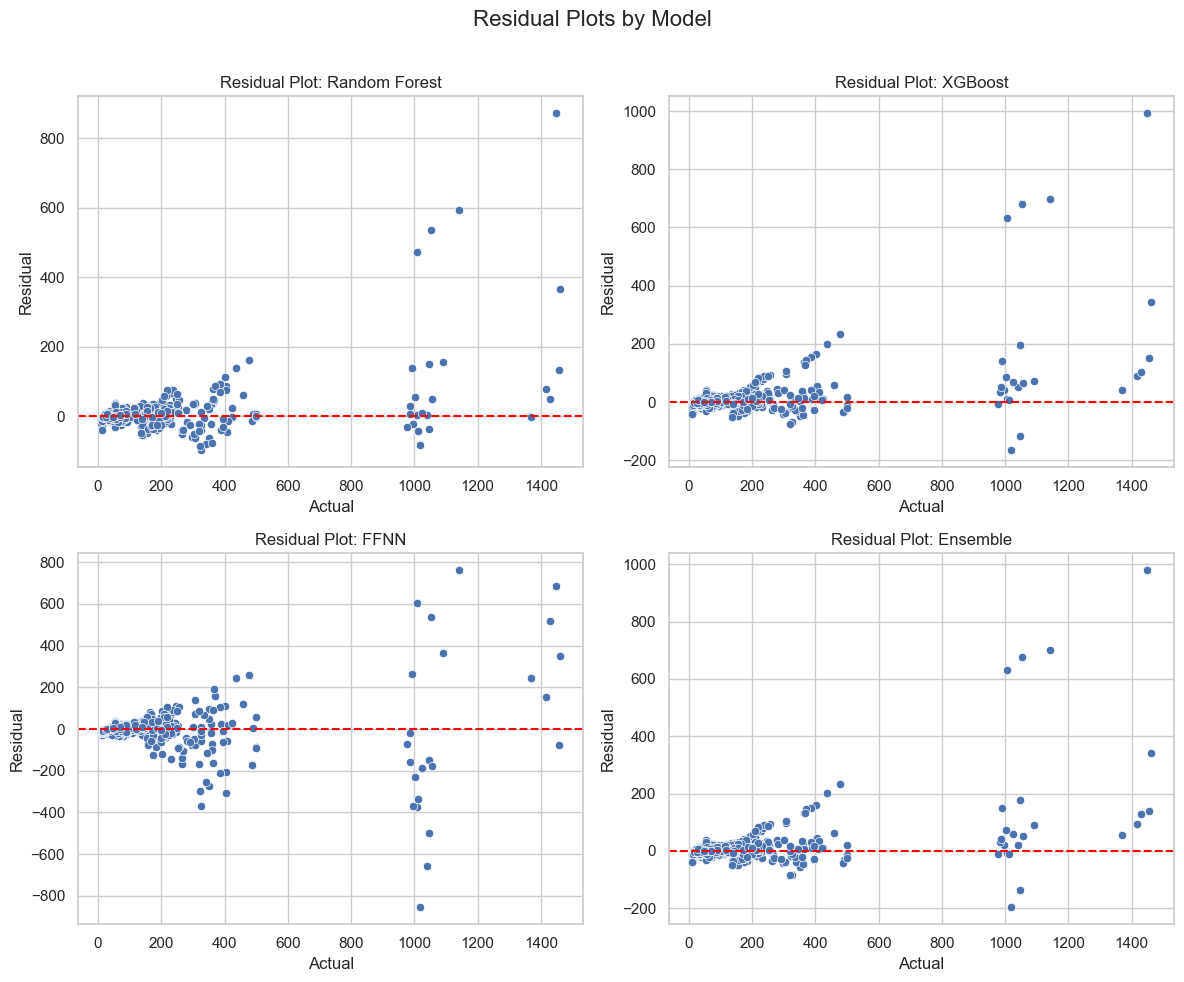

In [117]:
plot_residuals(y_test, model_preds, model_names)

In [118]:
def plot_rec_curves(y_test, predictions_dict):
    plt.figure(figsize=(10, 6))

    for model_name, y_pred in predictions_dict.items():
        errors = np.abs(y_test - y_pred)
        epsilon_range = np.linspace(0, np.max(errors), 100)
        coverage = [np.mean(errors <= eps) for eps in epsilon_range]
        plt.plot(epsilon_range, coverage, label=model_name)

    plt.xlabel("Absolute Error Tolerance (ε)")
    plt.ylabel("Proportion Within ε")
    plt.title("REC Curve (Regression ROC-like)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

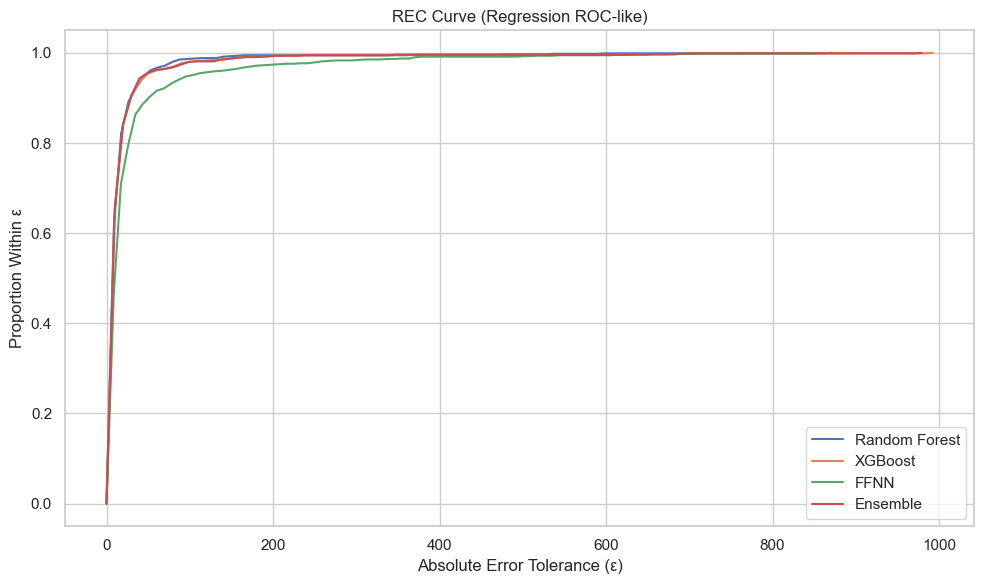

In [119]:
predictions_dict = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "FFNN": y_pred_ffnn,
    "Ensemble": ensemble_pred
}
plot_rec_curves(y_test, predictions_dict)

In [120]:
for pred in model_preds:
    print(pred.shape)

(954,)
(954,)
(954,)
(954,)


In [121]:
ensemble_log = np.average([
    np.log1p(y_pred_rf),
    np.log1p(y_pred_xgb),
    np.log1p(y_pred_ffnn)
], axis=0, weights=weights)

In [122]:
ensemble_pred = np.expm1(ensemble_log)

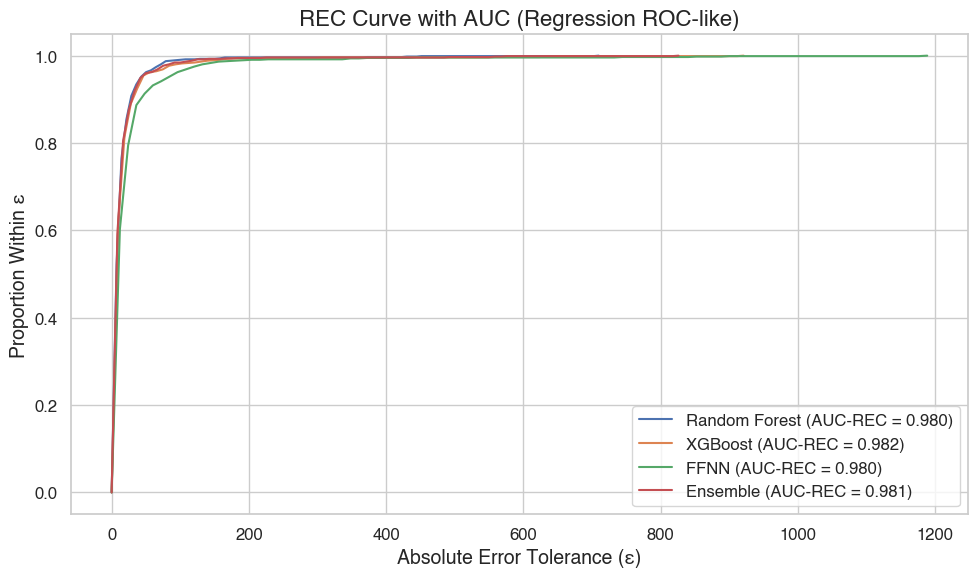

In [123]:
# Function to plot REC curves and calculate AUC-REC
def plot_rec_curves_with_auc(y_test, predictions_dict):
    plt.figure(figsize=(10, 6))

    for model_name, y_pred in predictions_dict.items():
        errors = np.abs(y_test - y_pred)
        epsilon_range = np.linspace(0, np.max(errors), 100)
        coverage = [np.mean(errors <= eps) for eps in epsilon_range]

        # Calculate AUC-REC (normalized)
        auc_rec = np.trapz(coverage, x=epsilon_range)
        auc_rec_normalized = auc_rec / np.max(epsilon_range)
        label = f"{model_name} (AUC-REC = {auc_rec_normalized:.3f})"

        plt.plot(epsilon_range, coverage, label=label)

    plt.xlabel("Absolute Error Tolerance (ε)")
    plt.ylabel("Proportion Within ε")
    plt.title("REC Curve with AUC (Regression ROC-like)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("AUC-REC.png",bbox_inches='tight')
    plt.show()

# Simulated example usage
predictions_dict = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "FFNN": y_pred_ffnn,
    "Ensemble": ensemble_pred
}

# Use the function to plot and show AUC-REC
plot_rec_curves_with_auc(y_test, predictions_dict)

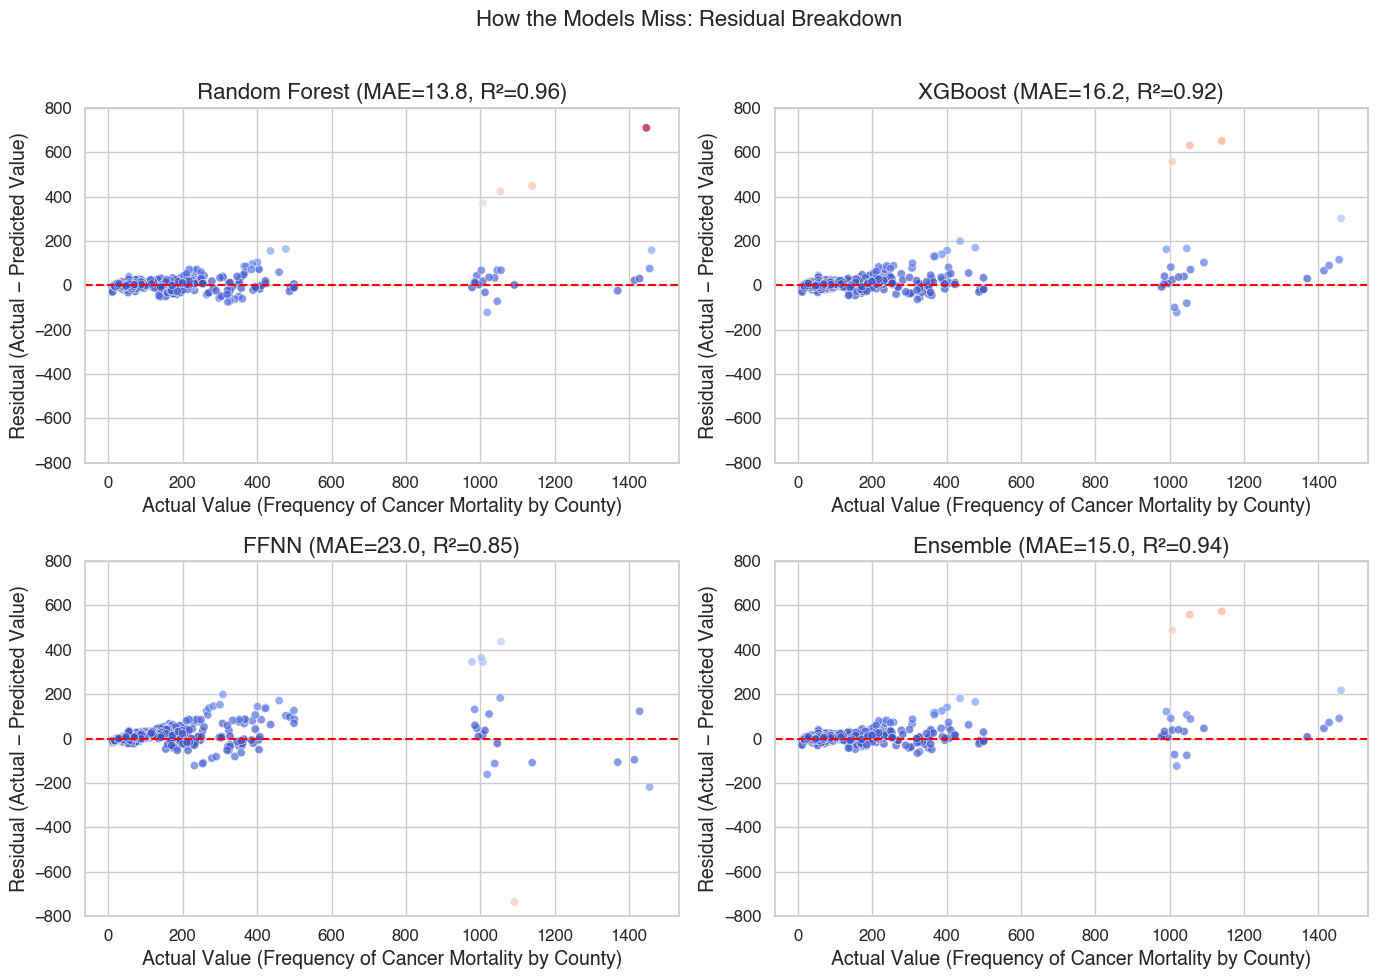

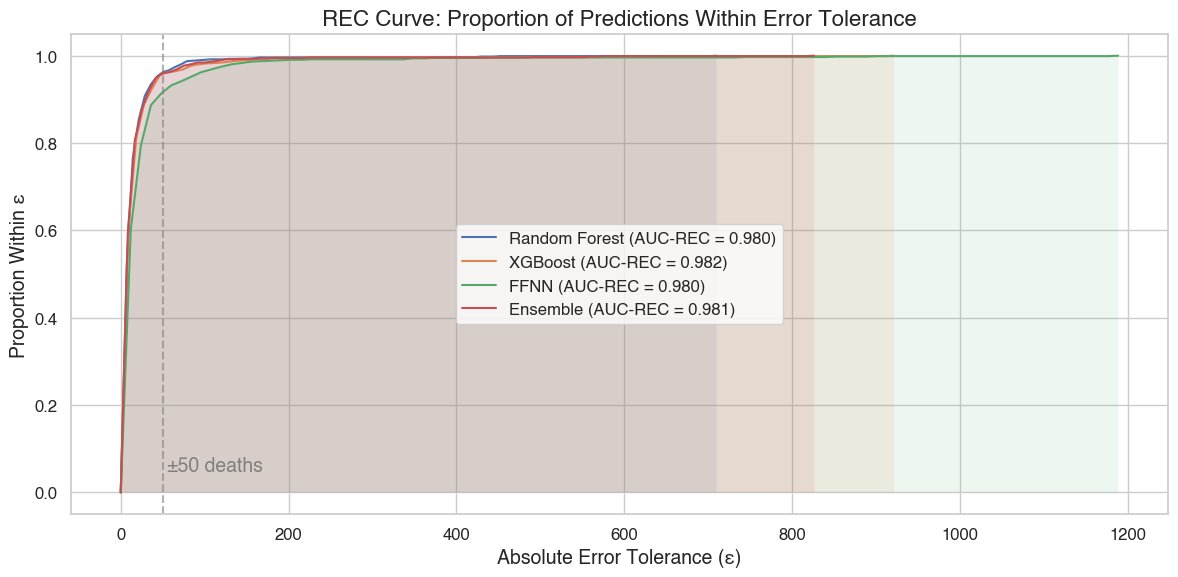

In [124]:
# Enhanced residual plot function with unified y-axis, stats in title, and colored residuals
def plot_residuals_enhanced(y_test, predictions_dict, metrics_dict=None, ylim=(-800, 800)):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        residuals = y_test - y_pred
        error_color = np.abs(residuals)

        sns.scatterplot(
            x=y_test,
            y=residuals,
            hue=error_color,
            palette="coolwarm",
            ax=axs[i],
            legend=False,
            alpha=0.7
        )
        axs[i].axhline(0, color='red', linestyle='--')
        axs[i].set_xlabel("Actual Value (Frequency of Cancer Mortality by County)")
        axs[i].set_ylabel("Residual (Actual − Predicted Value)")
        axs[i].set_ylim(*ylim)

        # Add MAE/R² in title if provided
        if metrics_dict and model_name in metrics_dict:
            mae, r2 = metrics_dict[model_name]
            axs[i].set_title(f"{model_name} (MAE={mae:.1f}, R²={r2:.2f})")
        else:
            axs[i].set_title(f"Residual Plot: {model_name}")

    plt.suptitle("How the Models Miss: Residual Breakdown", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("residual_enhanced_final.png", dpi= 300, bbox_inches='tight')
    plt.show()


# Enhanced REC curve plot with AUC and optional vertical threshold line
def plot_rec_curves_with_auc_enhanced(y_test, predictions_dict, threshold=50):
    plt.figure(figsize=(12, 6))

    max_auc = 0
    for model_name, y_pred in predictions_dict.items():
        errors = np.abs(y_test - y_pred)
        epsilon_range = np.linspace(0, np.max(errors), 100)
        coverage = [np.mean(errors <= eps) for eps in epsilon_range]

        # Calculate normalized AUC-REC
        auc_rec = np.trapz(coverage, x=epsilon_range)
        auc_rec_normalized = auc_rec / np.max(epsilon_range)
        max_auc = max(max_auc, auc_rec_normalized)

        plt.plot(epsilon_range, coverage, label=f"{model_name} (AUC-REC = {auc_rec_normalized:.3f})")
        plt.fill_between(epsilon_range, coverage, alpha=0.1)

    # Add vertical error threshold line
    plt.axvline(threshold, color='gray', linestyle='--', alpha=0.6)
    plt.text(threshold + 5, 0.05, f'±{threshold} deaths', color='gray')

    plt.xlabel("Absolute Error Tolerance (ε)")
    plt.ylabel("Proportion Within ε")
    plt.title("REC Curve: Proportion of Predictions Within Error Tolerance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("AUC-REC_enhanced_final.png",dpi = 300, bbox_inches='tight')
    plt.show()

# Generate dummy metrics and predictions for demonstration
from sklearn.metrics import mean_absolute_error, r2_score

# Reuse simulated data
predictions_dict = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "FFNN": y_pred_ffnn,
    "Ensemble": ensemble_pred
}

metrics_dict = {
    name: (mean_absolute_error(y_test, pred), r2_score(y_test, pred))
    for name, pred in predictions_dict.items()
}

# Plot enhanced visualizations
plot_residuals_enhanced(y_test, predictions_dict, metrics_dict)
plot_rec_curves_with_auc_enhanced(y_test, predictions_dict)

In [80]:
y_true = y_test

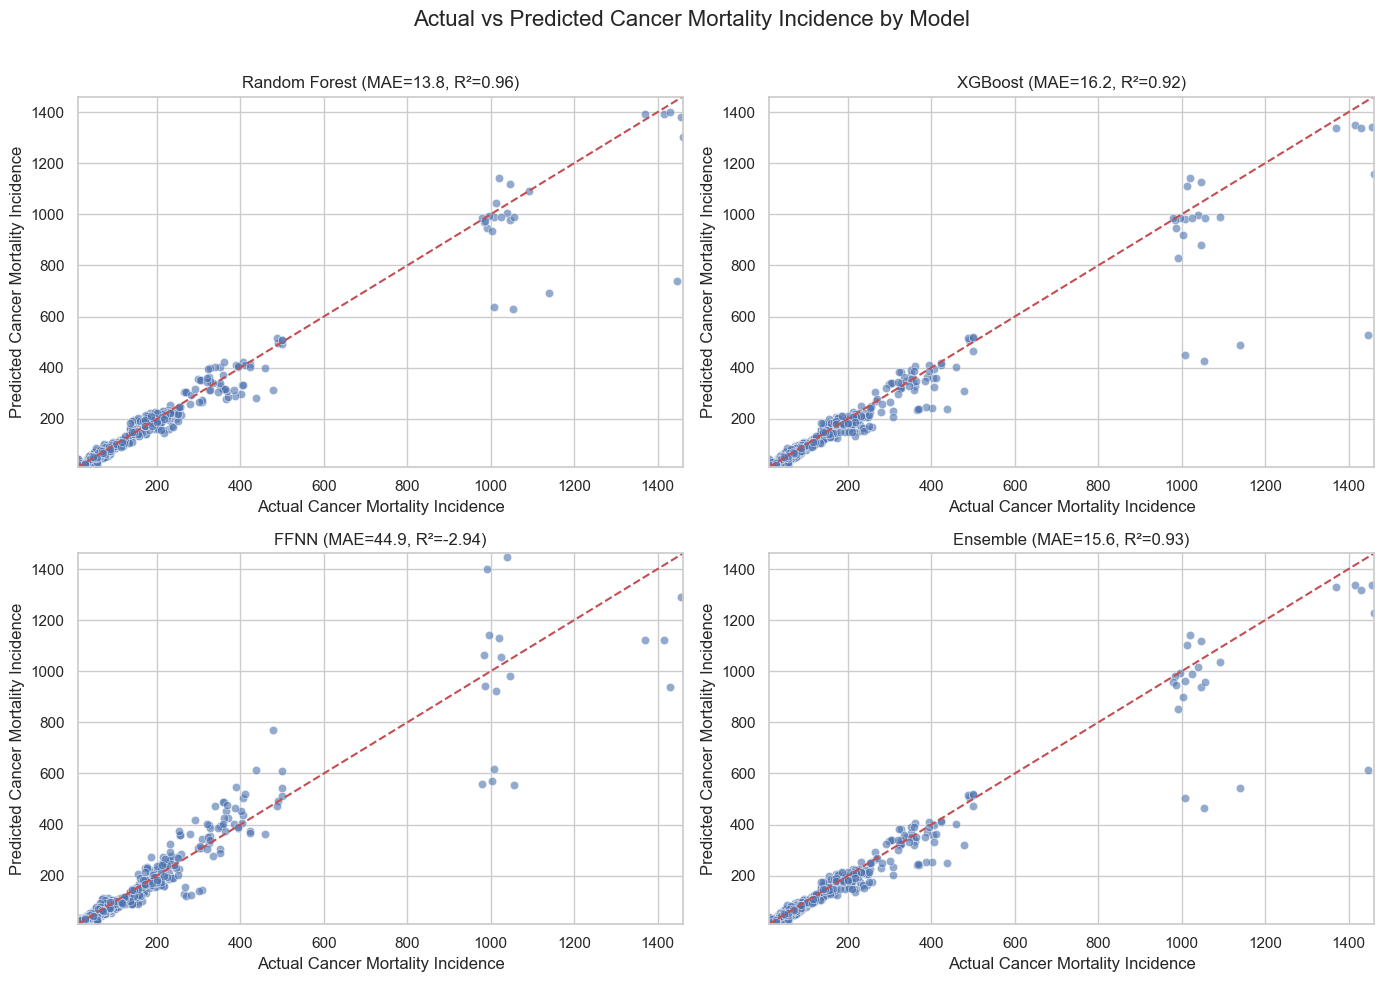

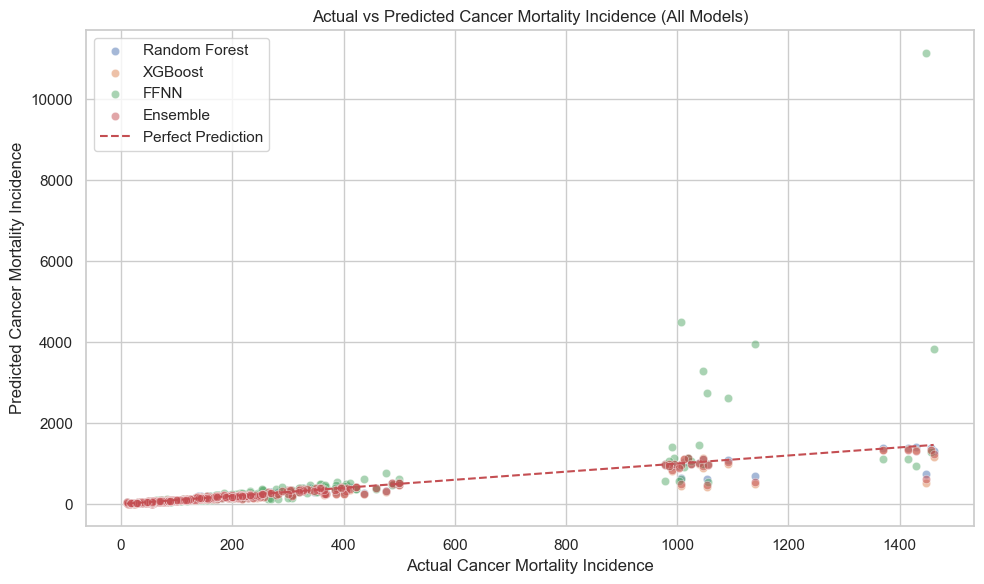

In [81]:
# Function: 2x2 grid of Actual vs Predicted per model
def plot_true_vs_predicted_grid(y_true, predictions_dict, metrics_dict=None):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        sns.scatterplot(x=y_true, y=y_pred, ax=axs[i], alpha=0.6)
        axs[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # identity line
        axs[i].set_xlabel("Actual Cancer Mortality Incidence")
        axs[i].set_ylabel("Predicted Cancer Mortality Incidence")
        axs[i].set_xlim([y_true.min(), y_true.max()])
        axs[i].set_ylim([y_true.min(), y_true.max()])

        if metrics_dict and model_name in metrics_dict:
            mae, r2 = metrics_dict[model_name]
            axs[i].set_title(f"{model_name} (MAE={mae:.1f}, R²={r2:.2f})")
        else:
            axs[i].set_title(f"True vs Predicted: {model_name}")

    plt.suptitle("Actual vs Predicted Cancer Mortality Incidence by Model", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("linear plot", dpi= 300, bbox_inches = 'tight')
    plt.show()


# Function: Combined plot with all models in one figure
def plot_true_vs_predicted_combined(y_true, predictions_dict):
    plt.figure(figsize=(10, 6))

    for model_name, y_pred in predictions_dict.items():
        sns.scatterplot(x=y_true, y=y_pred, label=model_name, alpha=0.5)

    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Perfect Prediction")
    plt.xlabel("Actual Cancer Mortality Incidence")
    plt.ylabel("Predicted Cancer Mortality Incidence")
    plt.title("Actual vs Predicted Cancer Mortality Incidence (All Models)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("combined linear plot", dpi= 300, bbox_inches = 'tight')
    plt.show()


# Plot both formats
plot_true_vs_predicted_grid(y_true, predictions_dict, metrics_dict)
plot_true_vs_predicted_combined(y_true, predictions_dict)

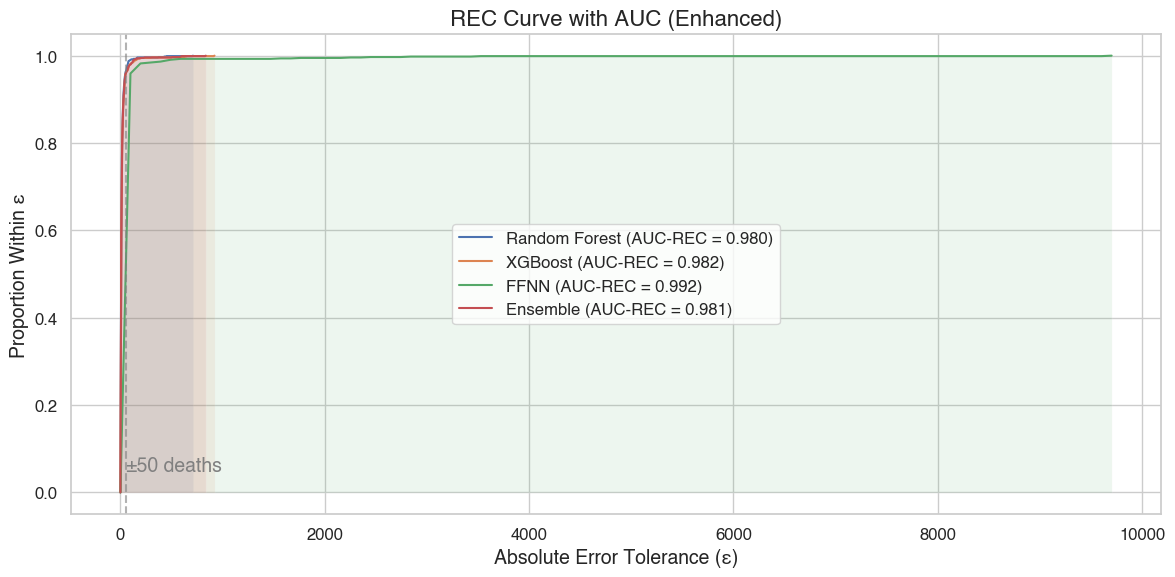

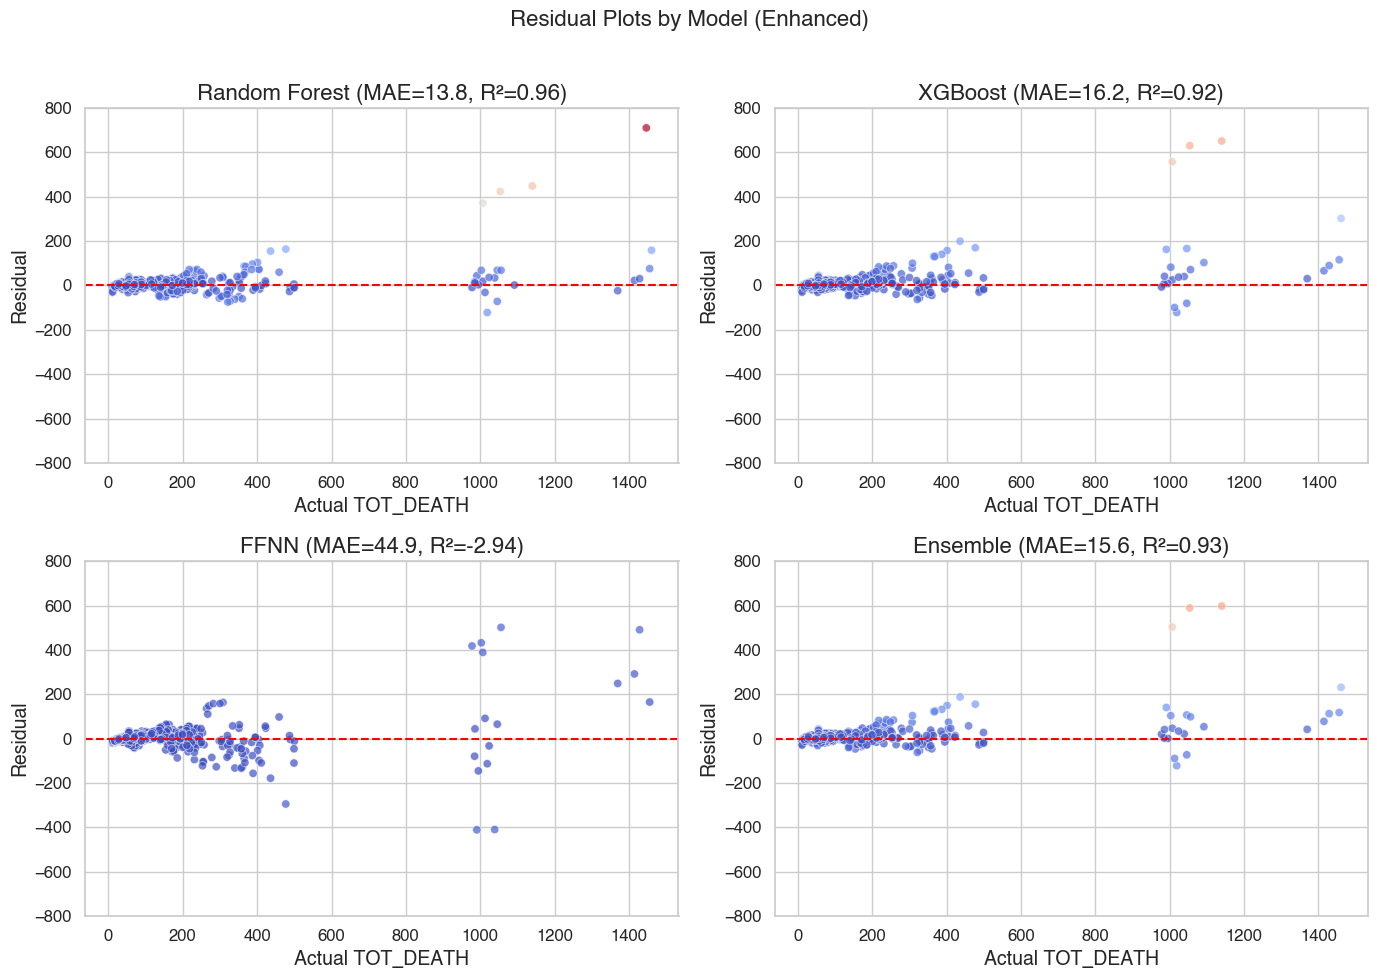

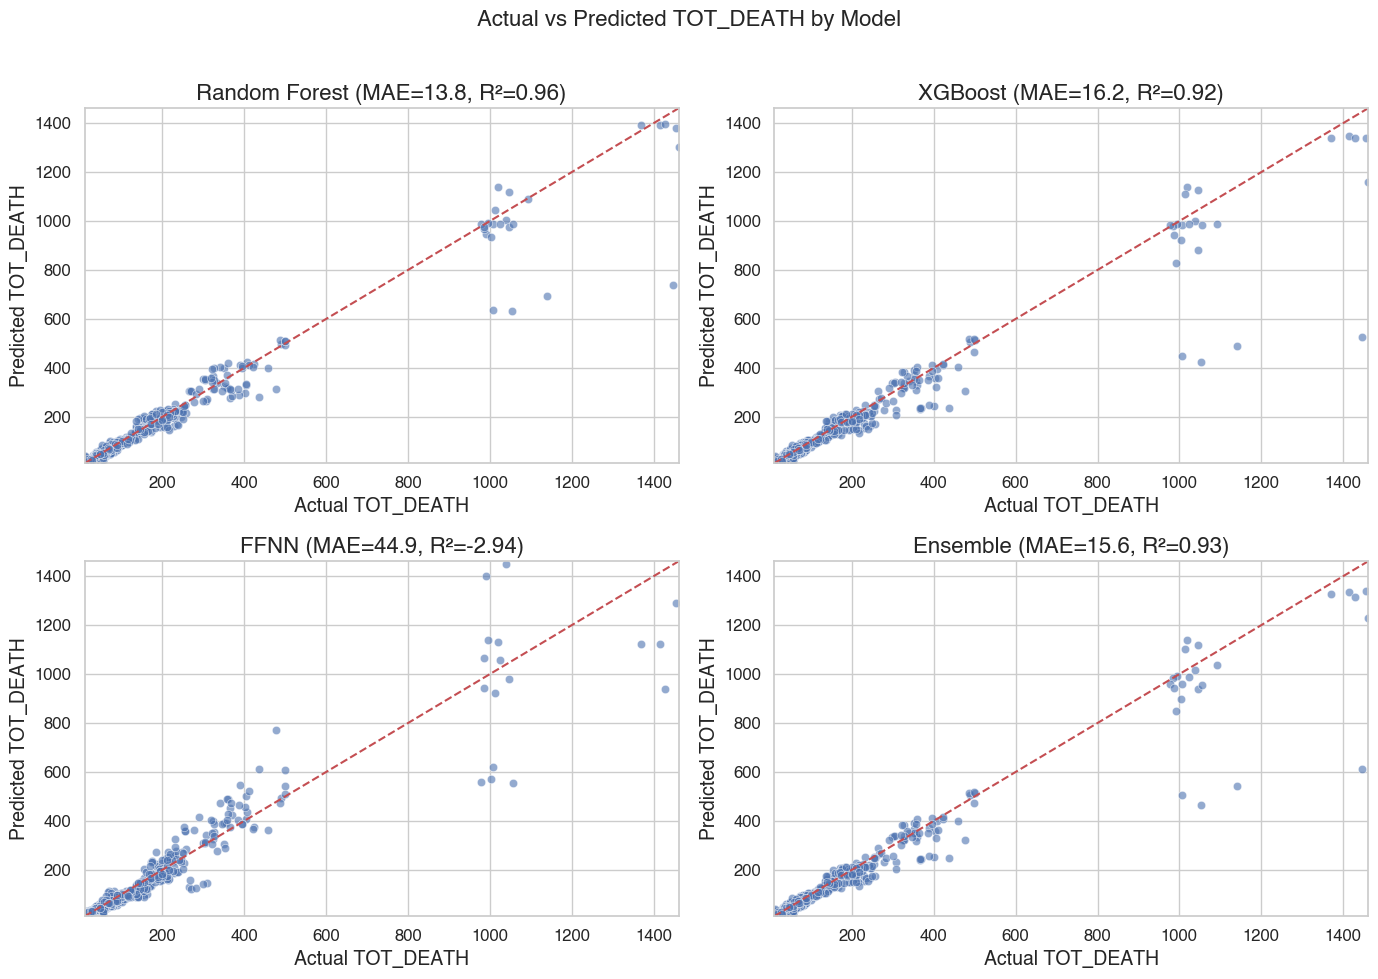

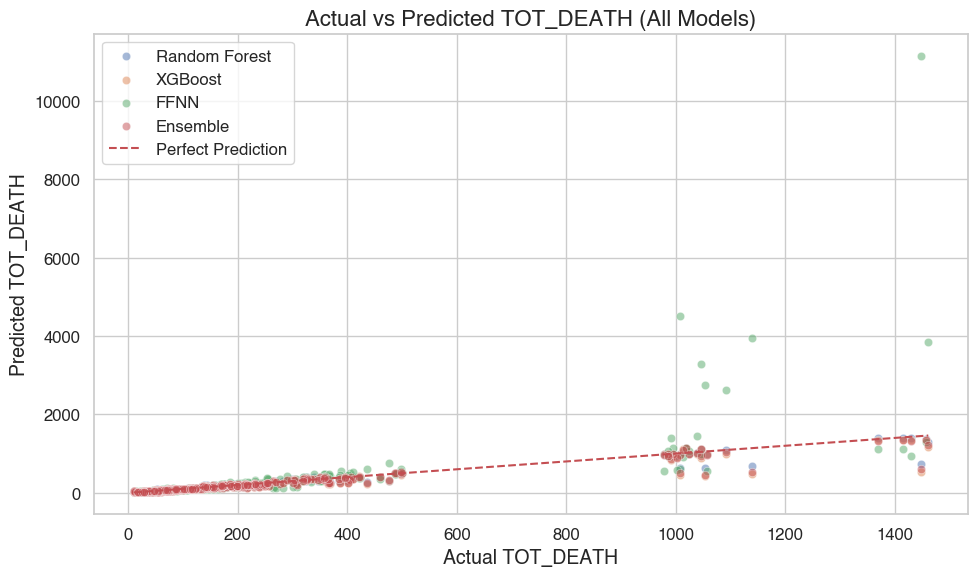

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Set global font style for poster aesthetics
plt.rcParams.update({
    "font.family": "Helvetica",
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# Generate metrics dict
metrics_dict = {
    name: (mean_absolute_error(y_true, pred), r2_score(y_true, pred))
    for name, pred in predictions_dict.items()
}

# Combined plot: REC Curve + Residuals Grid + True vs Predicted Grid + Overlay
def export_all_model_plots(y_true, predictions_dict, metrics_dict, threshold=50):
    # 1. REC Curve with AUC-REC
    plt.figure(figsize=(12, 6))
    for model_name, y_pred in predictions_dict.items():
        errors = np.abs(y_true - y_pred)
        epsilon_range = np.linspace(0, np.max(errors), 100)
        coverage = [np.mean(errors <= eps) for eps in epsilon_range]
        auc_rec = np.trapz(coverage, x=epsilon_range)
        auc_rec_normalized = auc_rec / np.max(epsilon_range)
        plt.plot(epsilon_range, coverage, label=f"{model_name} (AUC-REC = {auc_rec_normalized:.3f})")
        plt.fill_between(epsilon_range, coverage, alpha=0.1)

    plt.axvline(threshold, color='gray', linestyle='--', alpha=0.6)
    plt.text(threshold + 5, 0.05, f'±{threshold} deaths', color='gray')
    plt.xlabel("Absolute Error Tolerance (ε)")
    plt.ylabel("Proportion Within ε")
    plt.title("REC Curve with AUC (Enhanced)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("REC_Curve_AUC_Enhanced.png", dpi=300)
    plt.show()

    # 2. Residual Plots Grid
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        residuals = y_true - y_pred
        error_color = np.abs(residuals)
        sns.scatterplot(x=y_true, y=residuals, hue=error_color, palette="coolwarm", ax=axs[i], legend=False, alpha=0.7)
        axs[i].axhline(0, color='red', linestyle='--')
        axs[i].set_xlabel("Actual TOT_DEATH")
        axs[i].set_ylabel("Residual")
        axs[i].set_ylim(-800, 800)
        mae, r2 = metrics_dict[model_name]
        axs[i].set_title(f"{model_name} (MAE={mae:.1f}, R²={r2:.2f})")

    plt.suptitle("Residual Plots by Model (Enhanced)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("Residual_Plots_Enhanced.png", dpi=300)
    plt.show()

    # 3. True vs Predicted Grid
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        sns.scatterplot(x=y_true, y=y_pred, ax=axs[i], alpha=0.6)
        axs[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        axs[i].set_xlabel("Actual TOT_DEATH")
        axs[i].set_ylabel("Predicted TOT_DEATH")
        axs[i].set_xlim([y_true.min(), y_true.max()])
        axs[i].set_ylim([y_true.min(), y_true.max()])
        mae, r2 = metrics_dict[model_name]
        axs[i].set_title(f"{model_name} (MAE={mae:.1f}, R²={r2:.2f})")

    plt.suptitle("Actual vs Predicted TOT_DEATH by Model", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig("True_vs_Predicted_Grid.png", dpi=300)
    plt.show()

    # 4. Combined Overlay of Actual vs Predicted
    plt.figure(figsize=(10, 6))
    for model_name, y_pred in predictions_dict.items():
        sns.scatterplot(x=y_true, y=y_pred, label=model_name, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Perfect Prediction")
    plt.xlabel("Actual TOT_DEATH")
    plt.ylabel("Predicted TOT_DEATH")
    plt.title("Actual vs Predicted TOT_DEATH (All Models)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("True_vs_Predicted_Overlay.png", dpi=300)
    plt.show()

# Run the full export
export_all_model_plots(y_true, predictions_dict, metrics_dict)

In [169]:
#### in-progress

import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_selected is a NumPy array and X_train is a pandas DataFrame
# You need feature names from X_train.columns
feature_names = X_train.columns

# Convert X_train_selected to a DataFrame for better compatibility (optional but helpful)
import pandas as pd
X_train_df = pd.DataFrame(X_train_selected, columns=feature_names)

# Sample background and explanation data
X_background = X_train_df.sample(100, random_state=42)
X_explainer_sample = X_train_df.sample(200, random_state=42)

# SHAP explainer
explainer = shap.DeepExplainer(model, X_background.values)
shap_values = explainer.shap_values(X_explainer_sample.values)[0]

# Mean absolute SHAP values
shap_importance = np.abs(shap_values).mean(axis=0)
indices = np.argsort(shap_importance)[-10:]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), shap_importance[indices], align="center")
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel("Mean |SHAP Value|")
plt.title("Top 10 SHAP Feature Importances - Neural Network")
plt.savefig("shap_ffnn_feature", bbox_inches='tight')
plt.show()

/Users/ka-hyoncho/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Shape of passed values is (954, 31), indices imply (954, 1327)